## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint as pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(len(combined_df['Mouse ID'].unique()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids=combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df = combined_df[combined_df["Mouse ID"]!="g989"]
merge_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(merge_df['Mouse ID'].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = merge_df.groupby("Drug Regimen")
regimen_summary = {"Mean": regimen_df["Tumor Volume (mm3)"].mean(), 
                   "Median": regimen_df["Tumor Volume (mm3)"].median(),
                   "Variance": regimen_df["Tumor Volume (mm3)"].var(),
                   "Mode": regimen_df["Tumor Volume (mm3)"].std(),
                  "SEM": regimen_df["Tumor Volume (mm3)"].sem()}
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_summary_df = pd.DataFrame(regimen_summary)
regimen_summary_df.head()


,Mean,Median,Variance,Mode,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
# Using the aggregation method, produce the same summary statistics in a single line
merge_df.groupby("Drug Regimen").agg(aggregations)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

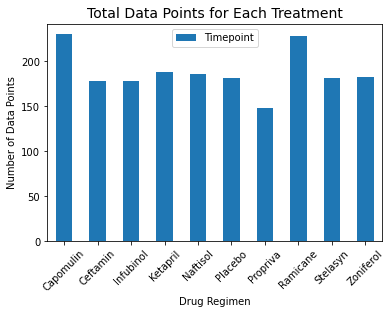

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Bar_DF = merge_df.groupby("Drug Regimen").count().reset_index()
Bar_DF.plot.bar(x='Drug Regimen', y='Timepoint', rot=45)
plt.title("Total Data Points for Each Treatment", fontsize = 14)
plt.title("Total Data Points for Each Treatment", fontsize = 14)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


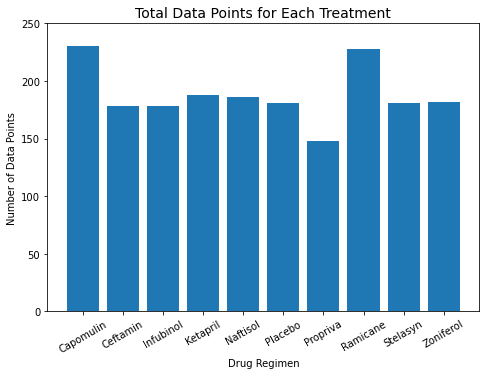

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x-axis and tick locations
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Bar_DF['Drug Regimen'],Bar_DF['Timepoint'])
plt.xticks(rotation=30)
plt.ylim(0, 250)
plt.title("Total Data Points for Each Treatment", fontsize = 14)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

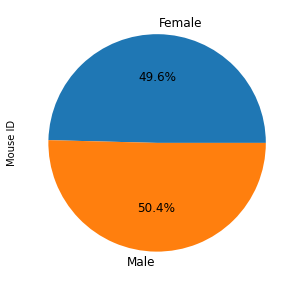

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = merge_df.groupby("Sex")["Mouse ID"].nunique()
plot = mice_gender.plot.pie(y='Sex', autopct="%1.1f%%", fontsize=12, figsize=(5, 5))

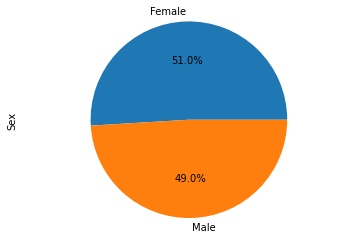

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
mice_gender_count = merge_df["Sex"].value_counts()
plt.pie(mice_gender_count, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merge_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, merge_df, on = ["Mouse ID","Timepoint"])
tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_vol_cap.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_vol_ram.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_vol_inf.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_vol_cef.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]

# Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 
     # Determine outliers using upper and lower bounds
    
outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{drugs[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile of tumor volum

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

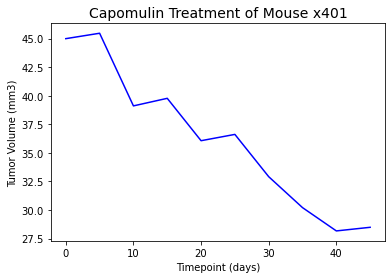

In [29]:
# # Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x401_tumor = merge_df.loc[merge_df["Mouse ID"]=="x401"]
x401_tumor.head()
# #Final plot
plt.plot(a275_tumor["Timepoint"],x401_tumor["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse x401", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0.5, 1.0, 'Weight Versus Average Tumor Volume for Capomulin')

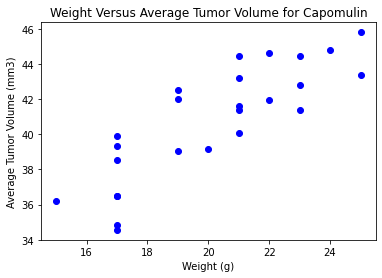

In [36]:
# # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# capomulin_df = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
# avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
# mouse_weight = capomulin_df["Weight (g)"].unique()
# plt.scatter(mouse_weight, avg_tumor_capomulin)
# plt.title("Average Tumor Volume Vs. Mouse Weight", fontsize = 14)
# plt.xlabel("Weight (g)")
# plt.ylabel("Average Tumor Volume (mm3)")
# plt.show()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_plot = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin")]
Capomulin_plot_df = Capomulin_plot.groupby(["Mouse ID"]).mean()

# set x and y value
weight_scatter_plot = Capomulin_plot_df["Weight (g)"]
volume_scatter_plot = Capomulin_plot_df["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Versus Average Tumor Volume for Capomulin")

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

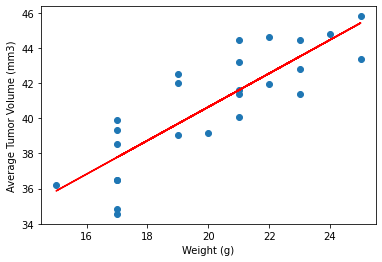

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()